# Scenarios Demonstrating Montecarlo Game
## Josh Gen

In [29]:
import pandas as pd
import numpy as np
from game_monte_carlo import Die
from game_monte_carlo import Game
from game_monte_carlo import Analyzer
import matplotlib.pyplot as plt

### Scenario 1: 2-headed coin

In [110]:
fair_coin = Die(np.array(['heads', 'tails']))
unfair_coin = Die(np.array(['heads', 'tails']))
unfair_coin.change_weight('heads', 5)
fairGame = Game([fair_coin, fair_coin, fair_coin])
unfairGame = Game([unfair_coin, unfair_coin, fair_coin])
fairAnalyzer = Analyzer(fairGame, 1000)
unfairAnalyzer = Analyzer(unfairGame, 1000)

The relative frequency of jackpots in the fair game is printed below.

In [111]:
fairAnalyzer.jackpot()/1000

0.24

The relative frequency of jackpots in the unfair game is printed below.

In [113]:
unfairAnalyzer.jackpot()/1000

0.358

The relative frequency of both games is graphed below.

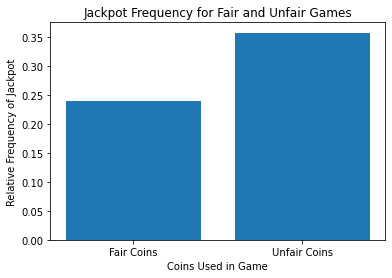

In [114]:
plt.bar(['Fair Coins', 'Unfair Coins'], [fairAnalyzer.jackpot()/1000, unfairAnalyzer.jackpot()/1000]);
plt.xlabel("Coins Used in Game")
plt.ylabel("Relative Frequency of Jackpot")
plt.title('Jackpot Frequency for Fair and Unfair Games');

### Scenario 2: 6-sided Die

In [119]:
fairDie = Die([1, 2, 3, 4, 5, 6])
unfairDie1 = Die([1, 2, 3, 4, 5, 6])
unfairDie1.change_weight(6, 5)
unfairDie2 = Die([1, 2, 3, 4, 5, 6])
unfairDie2.change_weight(1, 5)
fairDieGame = Game([fairDie, fairDie, fairDie, fairDie, fairDie])
unfairDieGame = Game([fairDie, fairDie, unfairDie1, unfairDie1, unfairDie2])
fairDieAnalyzer = Analyzer(fairDieGame, 10000)
unfairDieAnalyzer = Analyzer(unfairDieGame, 10000)

The relative frequency of the fair game is printed below.

In [120]:
fairDieAnalyzer.jackpot()/10000

0.0009

The relative frequency of the unfair game is printed below.

In [123]:
unfairDieAnalyzer.jackpot()/10000

0.0011

The relative frequencies of both the fair and unfari games are graphed below.

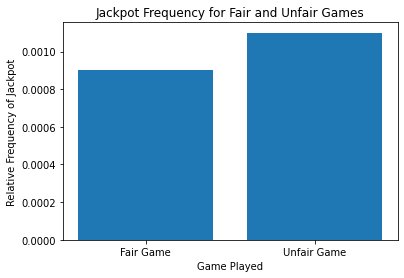

In [124]:
plt.bar(['Fair Game', 'Unfair Game'], [fairDieAnalyzer.jackpot()/10000, unfairDieAnalyzer.jackpot()/10000]);
plt.xlabel("Game Played")
plt.ylabel("Relative Frequency of Jackpot")
plt.title('Jackpot Frequency for Fair and Unfair Games');

The 10 most common combinations for both the fair and unfair games are plotted below.

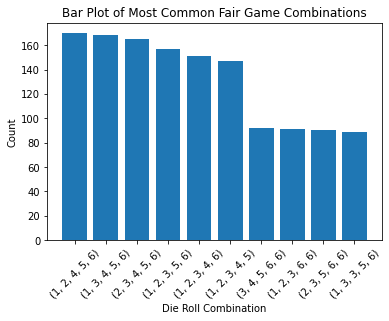

In [125]:
frequent_fair_combos = fairDieAnalyzer.combo()[0:10]
plt.bar(["".join(str(tup)) for tup in frequent_fair_combos.index.tolist()], frequent_fair_combos['size'].to_list());
plt.xticks(rotation=45)
plt.xlabel("Die Roll Combination")
plt.ylabel("Count")
plt.title('Bar Plot of Most Common Fair Game Combinations');


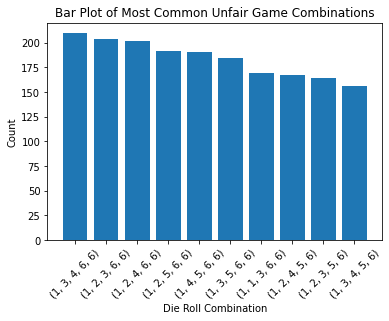

In [126]:
frequent_unfair_combos = unfairDieAnalyzer.combo()[0:10]
plt.bar(["".join(str(tup)) for tup in frequent_unfair_combos.index.tolist()], frequent_unfair_combos['size'].to_list());
plt.xticks(rotation=45)
plt.xlabel("Die Roll Combination")
plt.ylabel("Count")
plt.title('Bar Plot of Most Common Unfair Game Combinations');

### Scenario 3: Letters of the Roman Alphabet

In [133]:
letterDie = Die(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", 
                 "p", "q", "r", "s", "t", 'u', 'v', 'w', 'x', 'y', "z"])
letterDie.weights = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 
                     0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 
                     5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779 ,0.2722]
letterDieGame = Game([letterDie, letterDie, letterDie, letterDie, letterDie])
letterDieAnalyzer = Analyzer(letterDieGame, 1000)

The words created above are checked to see if they are in the Official Wordle Guess list below and the words contained in the list are printed.

In [134]:
faces = ["".join(word) for word in letterDieAnalyzer.combo().index.tolist()]
wordle_guesses = pd.read_csv('valid_guesses.csv')
wordle_guesses[wordle_guesses['word'].isin(faces)]

,word
1095,bortz
1643,civvy


The relative frequency of actual words in the game is shown below.

In [136]:
len(wordle_guesses[wordle_guesses['word'].isin(faces)])/1000

0.002